## Generating Training and Test Data based on a Sinusoidal Function

In [1]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib
from matplotlib                           import pyplot as plt
WORKSPACE_PATH  = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/ROMNet/romnet/extra/postprocessing/presentation.mplstyle')

In [2]:
OutputDir  = WORKSPACE_PATH+'/ROMNet/Data/Sinusoidal_Noisy/'
TestDir    = WORKSPACE_PATH+'/ROMNet/Data/Sinusoidal_Noisy_Test/'
try:
    os.makedirs(OutputDir)
except OSError as e:
    pass
try:
    os.makedirs(TestDir)
except OSError as e:
    pass

train_size = 32
test_size  = 64
noise      = 1.0

In [3]:
def f(x, sigma):
    epsilon = np.random.randn(*x.shape) * sigma
    return 10 * np.sin(2 * np.pi * (x)) + epsilon

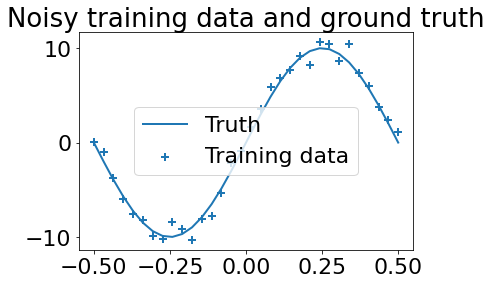

In [4]:
X_train      = np.linspace(-0.5, 0.5, train_size).reshape(-1, 1)
y_train      = f(X_train, sigma=noise)
y_train_true = f(X_train, sigma=0.0)

X_test = np.linspace(-1.5, 1.5, test_size).reshape(-1, 1)
y_test = f(X_test, sigma=noise)


plt.scatter(X_train, y_train, marker='+', label='Training data')
plt.plot(X_train, y_train_true, label='Truth')
plt.title('Noisy training data and ground truth')
plt.legend();

In [5]:
### Saving Data

Header   = 'x'
FileName = OutputDir+'/Input.csv'
np.savetxt(FileName, X_train, delimiter=',', header=Header, comments='')
        
Header   = 'y'
FileName = OutputDir+'/Output.csv'
np.savetxt(FileName, y_train, delimiter=',', header=Header, comments='')


Header   = 'x'
FileName = TestDir+'/Input.csv'
np.savetxt(FileName, X_test, delimiter=',', header=Header, comments='')
        
Header   = 'y'
FileName = TestDir+'/Output.csv'
np.savetxt(FileName, y_test, delimiter=',', header=Header, comments='')